## 1. Importing Libraries
This cell imports the necessary libraries and dependencies for the notebook.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

## 2. Data Loading
This cell is for loading and inspecting the data.

In [2]:
# Load the three datasets

#intializing three variables to store file path of the datasets
file1_path = 'shopping_behavior_updated.xlsx'
file2_path = 'women_clothing_ecommerce_sales.xlsx'
file3_path = 'API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_3402044.xlsx'


# Load the relevant Excel sheets, retaining only the specified sheet

df1 = pd.read_excel(file1_path, engine='openpyxl')                            # First file (Shopping behavior)
df2 = pd.read_excel(file2_path, engine='openpyxl')                            # Second file (Women clothing ecommerce sales)
df3 = pd.read_excel(file3_path, engine='openpyxl', sheet_name='Data') #'Data' sheet from the third Excel file (Unemployment data)

## 2. Data Incpection
These cells is for inspecting the data.

In [3]:
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df2.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264


In [5]:
df3.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-06-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.00000,2015.000000,2016.00000,2017.000000,2018.00000,2019.00000,2020.000000,2021.000000,2022.000000,2023.000000
3,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.79081,6.880312,7.02763,7.123032,7.06844,7.24467,7.661161,7.964493,7.448222,7.472824


## 3. Data Processing
These cells include the steps for processing and analyzing the data.

In [6]:
df3 = pd.read_excel(file3_path, engine='openpyxl', sheet_name='Data',skiprows=3)

In [7]:
# Select only the relevant columns and drop the others
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2022']
df3_cleaned = df3[columns_to_keep]

# Display the cleaned df3
df3_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2022
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.448222
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,14.100000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.737766
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,14.693000


## Check For Similar Columns To Merge The Dataframes: 

In [8]:
# Check the column names of each dataframe
print("df1 columns:", df1.columns)
print("df2 columns:", df2.columns)
print("df3 columns:", df3_cleaned.columns)

df1 columns: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')
df2 columns: Index(['order_id', 'order_date', 'sku', 'color', 'size', 'unit_price',
       'quantity', 'revenue'],
      dtype='object')
df3 columns: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2022'],
      dtype='object')


## Merging The Datasets:

In [9]:
# renaming the coloumns for second dataframes

df2.rename(columns={'color': 'Color', 'size': 'Size'}, inplace=True)

# Merge df1 and df2 on the renamed coloumns

merged_df = pd.merge(df1, df2, how='inner', left_on=['Color', 'Size'], right_on=['Color', 'Size'])

#adding Country Code columns to merged_df 

merged_df['Country Code'] = 'USA' 

In [10]:
# Merge merged_df and df3 on the added coloumn
final_merged_df = pd.merge(merged_df, df3_cleaned, how='inner', left_on='Country Code', right_on='Country Code')


final_merged_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,order_date,sku,unit_price,quantity,revenue,Country Code,Country Name,Indicator Name,Indicator Code,2022
0,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-08-09 13:27:00,218,296,1,296,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
1,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
2,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
3,31,57,Male,Jewelry,Accessories,31,North Carolina,L,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
4,81,19,Male,Sandals,Footwear,72,New York,XL,Blue,Summer,...,2022-07-31 18:25:00,628,268,1,268,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65


Inserting Pandas Dataframe To An Excel File:

In [11]:
final_merged_df.to_excel('prepocessed.xlsx', index=False)

## Checking And Treating Null Values:

In [46]:
# Check for missing values in each column
missing_values = final_merged_df.isnull().sum()

In [13]:
# Adjust threshold for dropping columns, e.g., 30% missing values
threshold = len(final_merged_df) * 0.5
final_merged_df.dropna(thresh=threshold, axis=1, inplace=True)

final_merged_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,order_date,sku,unit_price,quantity,revenue,Country Code,Country Name,Indicator Name,Indicator Code,2022
0,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-08-09 13:27:00,218,296,1,296,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
1,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
2,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
3,31,57,Male,Jewelry,Accessories,31,North Carolina,L,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
4,81,19,Male,Sandals,Footwear,72,New York,XL,Blue,Summer,...,2022-07-31 18:25:00,628,268,1,268,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,3855,57,Female,T-shirt,Clothing,20,Florida,M,Black,Spring,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
320,3855,57,Female,T-shirt,Clothing,20,Florida,M,Black,Spring,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
321,3872,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,...,2022-08-09 13:27:00,218,296,1,296,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
322,3872,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65


## Checking And Treating Missing Values

In [14]:
# Impute missing values in numeric columns with the median
numeric_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns
final_merged_df[numeric_cols] = final_merged_df[numeric_cols].fillna(final_merged_df[numeric_cols].median())

In [15]:
# Impute missing values in categorical columns with the mode
categorical_cols = final_merged_df.select_dtypes(include=['object']).columns

# Use fillna with a dictionary and then call infer_objects to ensure correct types
final_merged_df.fillna({col: final_merged_df[col].mode()[0] for col in categorical_cols}, inplace=True)

# Use infer_objects to avoid future downcasting warnings
final_merged_df = final_merged_df.infer_objects(copy=False)

categorical_cols


C:\Users\HP\AppData\Local\Temp\ipykernel_6492\263592730.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_merged_df.fillna({col: final_merged_df[col].mode()[0] for col in categorical_cols}, inplace=True)


Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases', 'sku',
       'Country Code', 'Country Name', 'Indicator Name', 'Indicator Code'],
      dtype='object')

## Detect and treat outliers

In [16]:
# Calculate IQR
Q1 = final_merged_df[numeric_cols].quantile(0.25)
Q3 = final_merged_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR (using 1.5 * IQR for both lower and upper bounds)
iqr_outliers = ((final_merged_df[numeric_cols] < (Q1 - 1.5 * IQR)) | (final_merged_df[numeric_cols] > (Q3 + 1.5 * IQR)))

# Mark rows as outliers if any column has an outlier
iqr_outliers = iqr_outliers.any(axis=1)

# Display the outliers
iqr_outliers


0       True
1      False
2      False
3      False
4       True
       ...  
319    False
320    False
321     True
322    False
323    False
Length: 324, dtype: bool

In [17]:
# Identify numeric columns
numeric_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores
z_scores = stats.zscore(final_merged_df[numeric_cols])
abs_z_scores = np.abs(z_scores)
z_outliers = (abs_z_scores > 3).all(axis=1)  # Define outliers based on Z-score

# Remove outliers from DataFrame
final_merged_df = final_merged_df[~z_outliers]

final_merged_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,order_date,sku,unit_price,quantity,revenue,Country Code,Country Name,Indicator Name,Indicator Code,2022
0,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-08-09 13:27:00,218,296,1,296,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
1,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
2,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
3,31,57,Male,Jewelry,Accessories,31,North Carolina,L,Black,Winter,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
4,81,19,Male,Sandals,Footwear,72,New York,XL,Blue,Summer,...,2022-07-31 18:25:00,628,268,1,268,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,3855,57,Female,T-shirt,Clothing,20,Florida,M,Black,Spring,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
320,3855,57,Female,T-shirt,Clothing,20,Florida,M,Black,Spring,...,2022-09-04 14:51:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
321,3872,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,...,2022-08-09 13:27:00,218,296,1,296,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65
322,3872,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,...,2022-09-03 19:01:00,218,318,1,318,USA,United States,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.65


## Perform necessary transformations such as normalization or standardization

Noramilzation of numeric columns using min max scaler

In [18]:
# Identify numerical columns
numeric_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Check for constant columns
constant_cols = final_merged_df[numeric_cols].nunique() == 1
constant_cols_names = constant_cols[constant_cols].index
print("Constant columns:", constant_cols_names)

# Print numerical columns before normalization
print("Before normalization:")
print(final_merged_df[numeric_cols].head())

# Drop constant columns from numeric_cols
numeric_cols_filtered = numeric_cols.difference(constant_cols_names)

# Normalize
min_max_scaler = MinMaxScaler()
final_merged_df.loc[:, numeric_cols_filtered] = min_max_scaler.fit_transform(final_merged_df[numeric_cols_filtered])

# Print numerical columns after normalization
print("After normalization:")
print(final_merged_df[numeric_cols_filtered].head())

Constant columns: Index(['quantity', '2022'], dtype='object')
Before normalization:
   Customer ID  Age  Purchase Amount (USD)  Review Rating  Previous Purchases  \
0           21   21                     51            2.8                  50   
1           21   21                     51            2.8                  50   
2           21   21                     51            2.8                  50   
3           31   57                     31            4.7                  16   
4           81   19                     72            3.3                  24   

   order_id  sku  unit_price  quantity  revenue  2022  
0        36  218         296         1      296  3.65  
1       124  218         318         1      318  3.65  
2       134  218         318         1      318  3.65  
3       134  218         318         1      318  3.65  
4       158  628         268         1      268  3.65  
After normalization:
        Age  Customer ID  Previous Purchases  Purchase Amount (USD)  \
0

C:\Users\HP\AppData\Local\Temp\ipykernel_6492\3418750.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05769231 0.05769231 0.05769231 0.75       0.01923077 0.73076923
 0.73076923 0.73076923 0.67307692 0.78846154 0.78846154 0.78846154
 0.28846154 0.73076923 0.15384615 0.15384615 0.15384615 0.76923077
 0.55769231 0.86538462 0.61538462 0.61538462 0.61538462 0.15384615
 0.34615385 0.34615385 0.34615385 0.82692308 0.82692308 0.82692308
 0.57692308 0.57692308 0.57692308 0.01923077 0.01923077 0.01923077
 0.48076923 0.48076923 0.48076923 0.28846154 0.28846154 0.28846154
 0.46153846 0.38461538 0.46153846 0.46153846 0.46153846 0.46153846
 0.46153846 0.46153846 0.67307692 0.67307692 0.67307692 0.19230769
 0.40384615 0.53846154 0.48076923 0.03846154 0.03846154 0.03846154
 0.28846154 0.28846154 0.28846154 0.03846154 0.11538462 0.11538462
 0.11538462 0.69230769 0.03846154 0.78846154 0.13461538 0.13461538
 0.13461538 0.769

Noramlization of categgorical columns using label encoder

In [19]:
# Identify categorical columns
categorical_cols = final_merged_df.select_dtypes(include=['object']).columns

# Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Use .loc to avoid SettingWithCopyWarning
    final_merged_df.loc[:, col] = le.fit_transform(final_merged_df[col].astype(str))
    label_encoders[col] = le


## Feature Extraction

In [20]:
# Create Discount Impact feature using .loc to avoid SettingWithCopyWarning

final_merged_df.loc[:, 'discount_impact'] = np.where(
    final_merged_df['unit_price'] != 0,
    ((final_merged_df['unit_price'] - final_merged_df['Purchase Amount (USD)']) / final_merged_df['unit_price']) * 100,
    0  # Assign 0 or an appropriate value if `unit_price` is zero
)

# Create Purchase Frequency Index feature using .loc
final_merged_df.loc[:, 'purchase_frequency_index'] = final_merged_df['Frequency of Purchases'] * final_merged_df['Previous Purchases']

# Display the new columns along with some existing columns for context
columns_to_view = ['Customer ID', 'Purchase Amount (USD)', 'unit_price', 'discount_impact', 'purchase_frequency_index']
print(final_merged_df[columns_to_view].head())


   Customer ID  Purchase Amount (USD)  unit_price  discount_impact  \
0     0.000000                 0.3875        0.56        30.803571   
1     0.000000                 0.3875        1.00        61.250000   
2     0.000000                 0.3875        1.00        61.250000   
3     0.002597                 0.1375        1.00        86.250000   
4     0.015580                 0.6500        0.00         0.000000   

  purchase_frequency_index  
0                      2.0  
1                      2.0  
2                      2.0  
3                  1.22449  
4                 0.938776  


In [21]:
# Impute missing values in numeric columns with the median
numeric_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns
final_merged_df[numeric_cols] = final_merged_df[numeric_cols].fillna(final_merged_df[numeric_cols].median())

In [22]:
extracted_columns=['discount_impact','purchase_frequency_index']
min_max_scaler = MinMaxScaler()
final_merged_df.loc[:, extracted_columns] = min_max_scaler.fit_transform(final_merged_df[extracted_columns])

In [23]:
columns_to_view = ['Customer ID', 'Purchase Amount (USD)', 'unit_price', 'discount_impact', 'purchase_frequency_index']
print(final_merged_df[columns_to_view].head())

   Customer ID  Purchase Amount (USD)  unit_price  discount_impact  \
0     0.000000                 0.3875        0.56           0.6125   
1     0.000000                 0.3875        1.00           0.7830   
2     0.000000                 0.3875        1.00           0.7830   
3     0.002597                 0.1375        1.00           0.9230   
4     0.015580                 0.6500        0.00           0.4400   

  purchase_frequency_index  
0                 0.355072  
1                 0.355072  
2                 0.355072  
3                 0.217391  
4                 0.166667  

## Dimensionality Reduction with PCA

In [24]:
# Select numeric columns
numeric_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numeric data and transform it
standardized_data = scaler.fit_transform(final_merged_df[numeric_cols])

print(standardized_data)

[[-1.89980752e+00 -1.53893800e+00 -3.52236075e-01 ... -1.33492599e+00
   8.88178420e-16 -2.31576954e-01]
 [-1.89980752e+00 -1.53893800e+00 -3.52236075e-01 ...  5.19195689e-01
   8.88178420e-16  5.21470732e-01]
 [-1.89980752e+00 -1.53893800e+00 -3.52236075e-01 ...  5.19195689e-01
   8.88178420e-16  5.21470732e-01]
 ...
 [ 1.72027772e+00  7.09760902e-01  1.55953613e+00 ... -1.33492599e+00
   8.88178420e-16 -2.77118059e+00]
 [ 1.72027772e+00  7.09760902e-01  1.55953613e+00 ...  5.19195689e-01
   8.88178420e-16 -9.00707303e-01]
 [ 1.72027772e+00  7.09760902e-01  1.55953613e+00 ...  5.19195689e-01
   8.88178420e-16 -9.00707303e-01]]


Applying PCA and plotting cumulative explained variance by pca components 

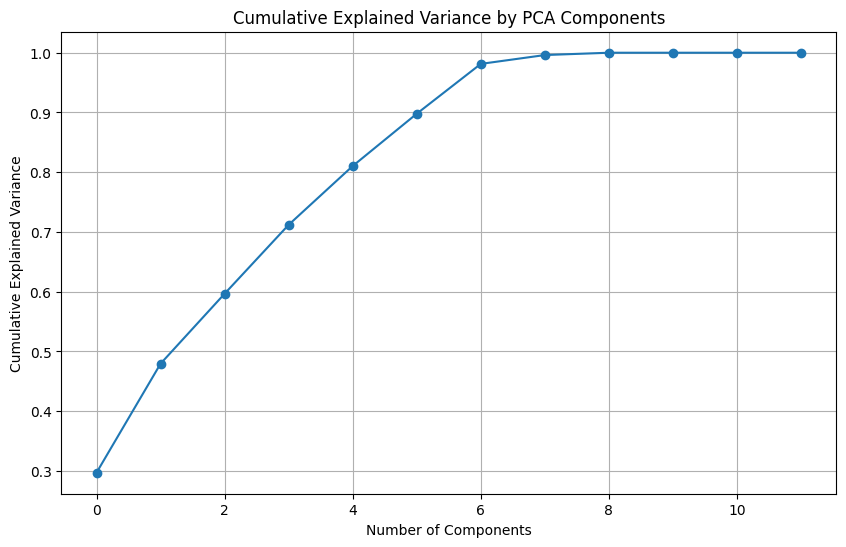

In [25]:
# Apply PCA
pca = PCA()
pca.fit(standardized_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Number of components

In [26]:
# Determine the number of components explaining 95% of variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components chosen: {num_components}')


Number of components chosen: 7


Apply PCA for suitable number of components

In [27]:
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(standardized_data)

# creating a dataframe having all suitablta pcs in cols
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(num_components)])

First Two Principle Components

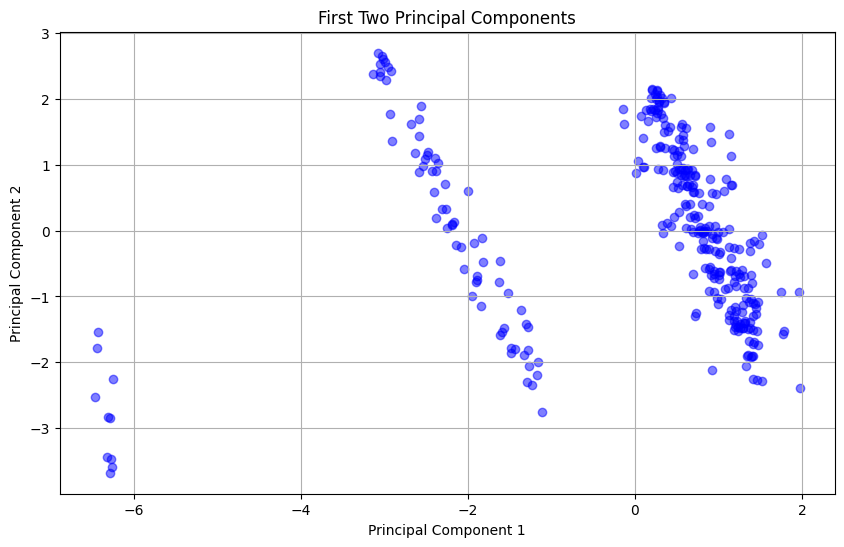

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, c='blue')
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Pairwise plot of original features

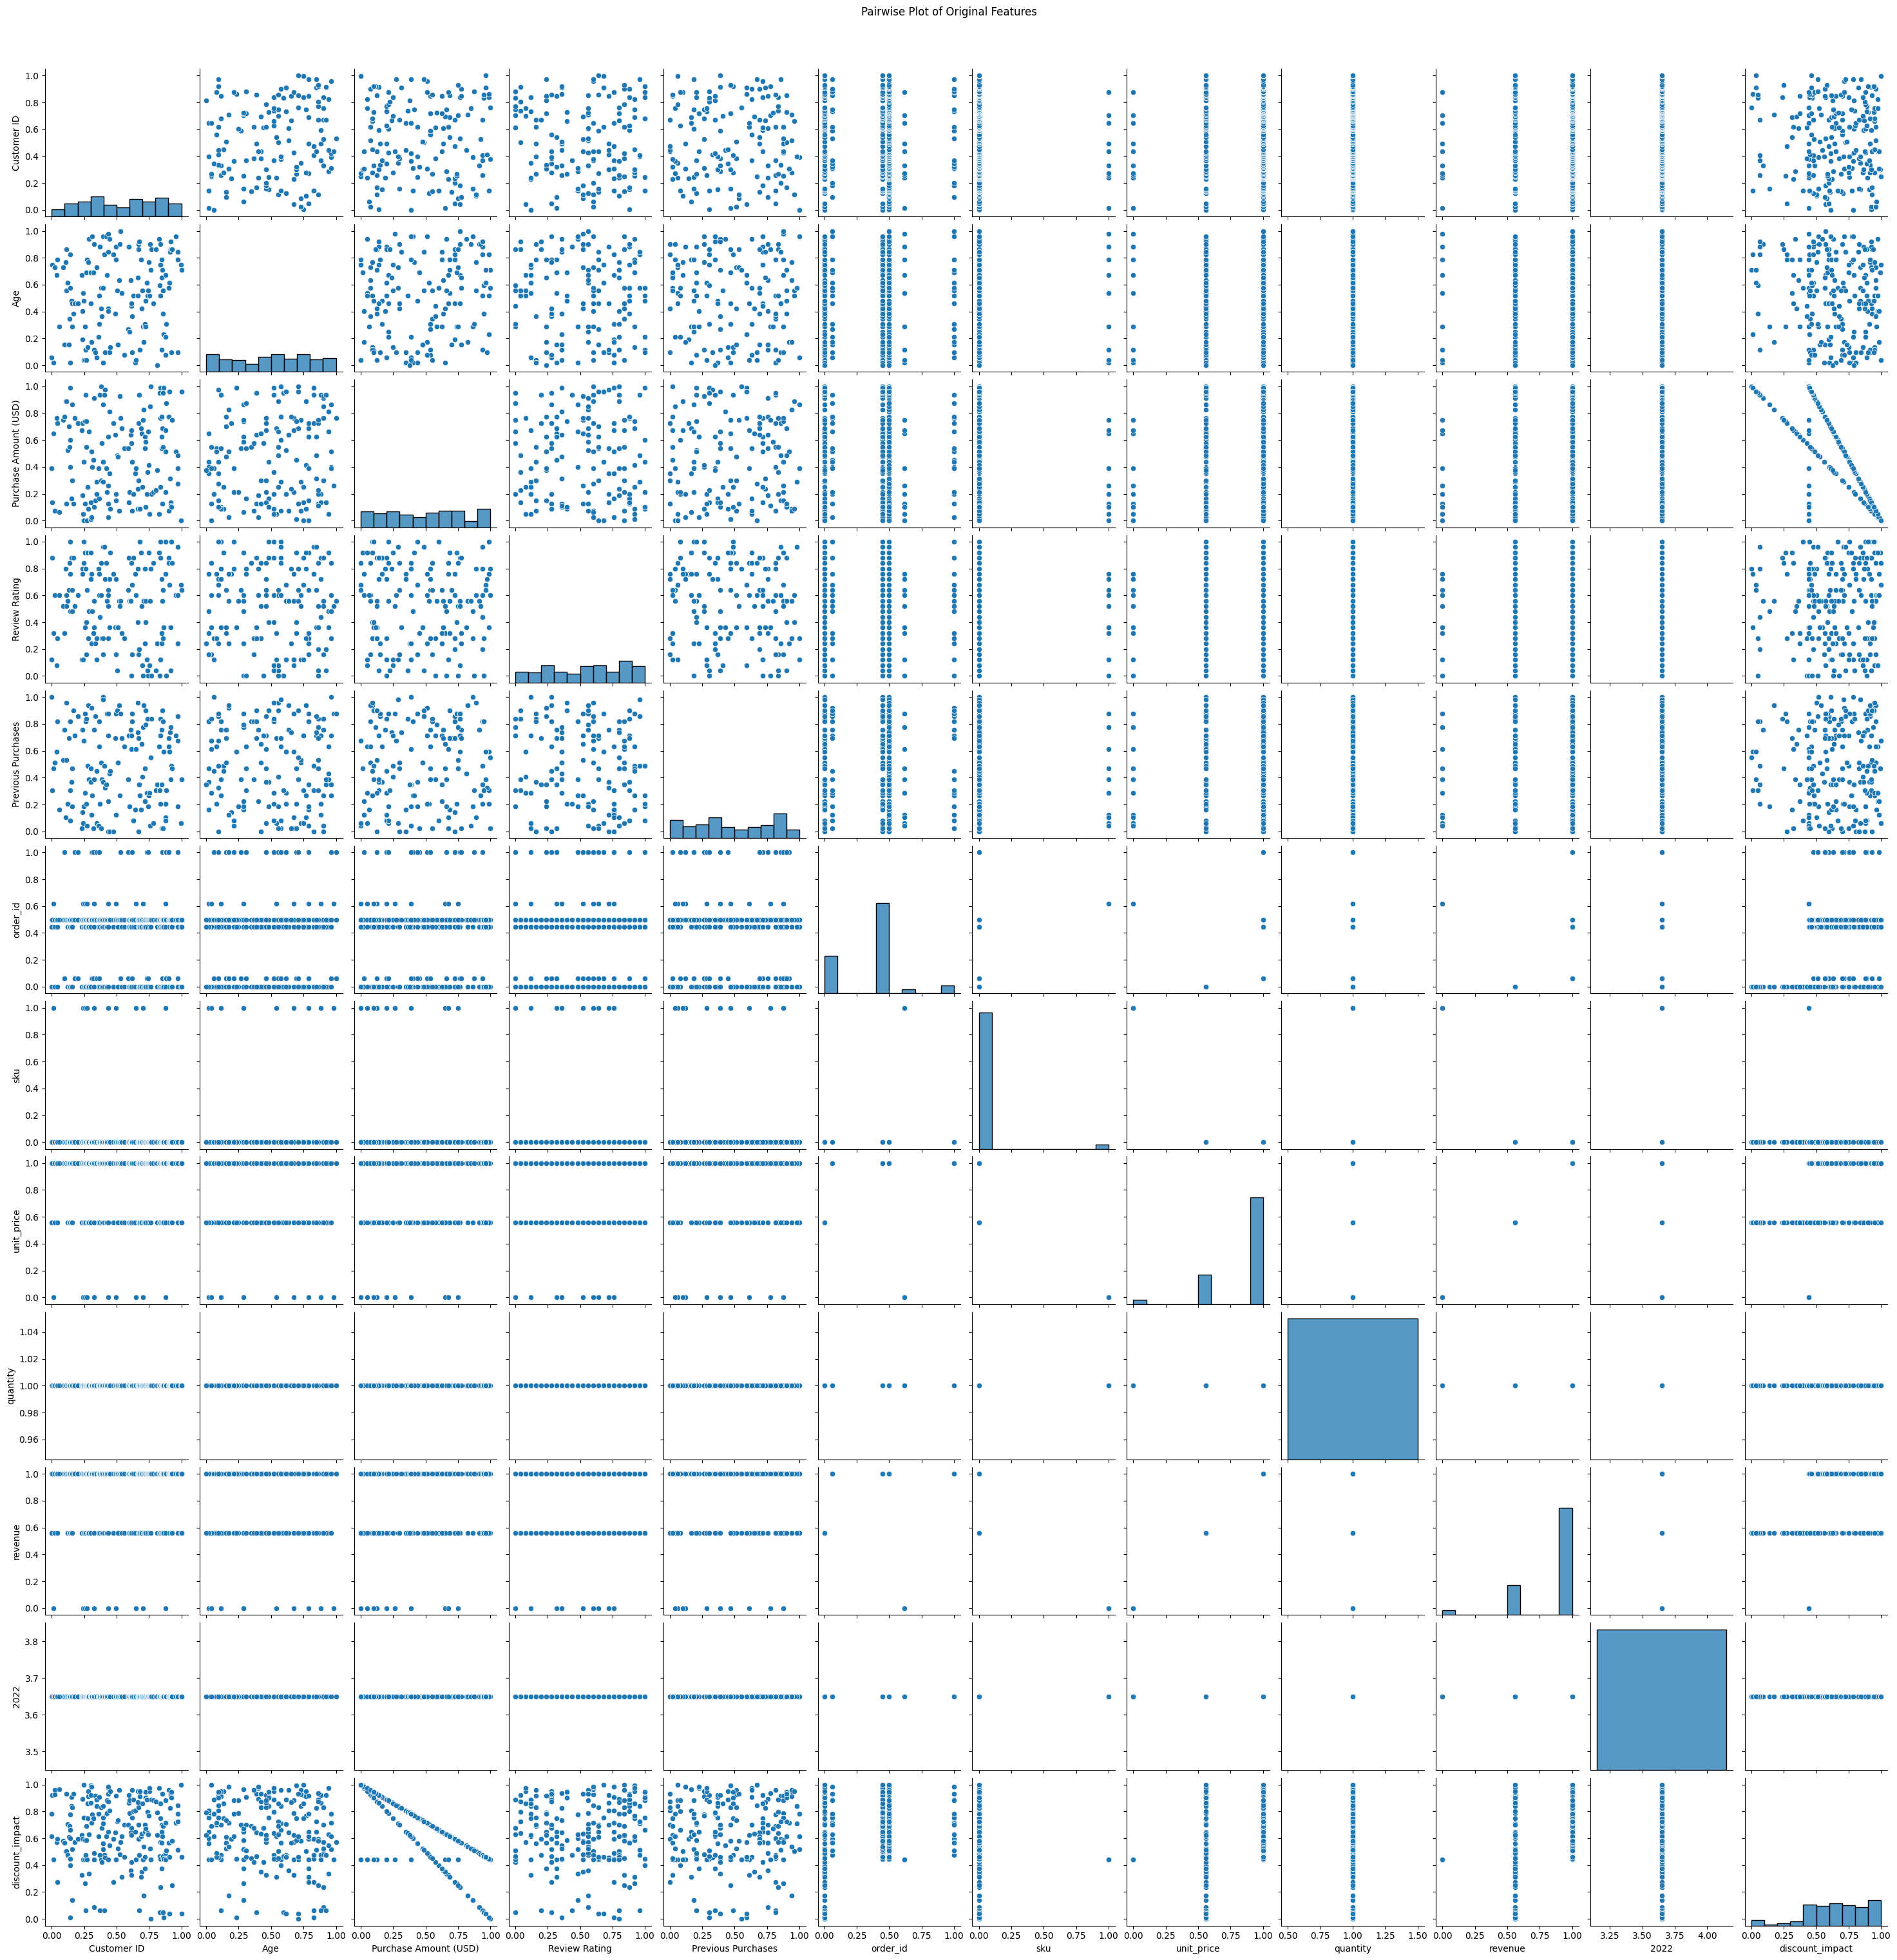

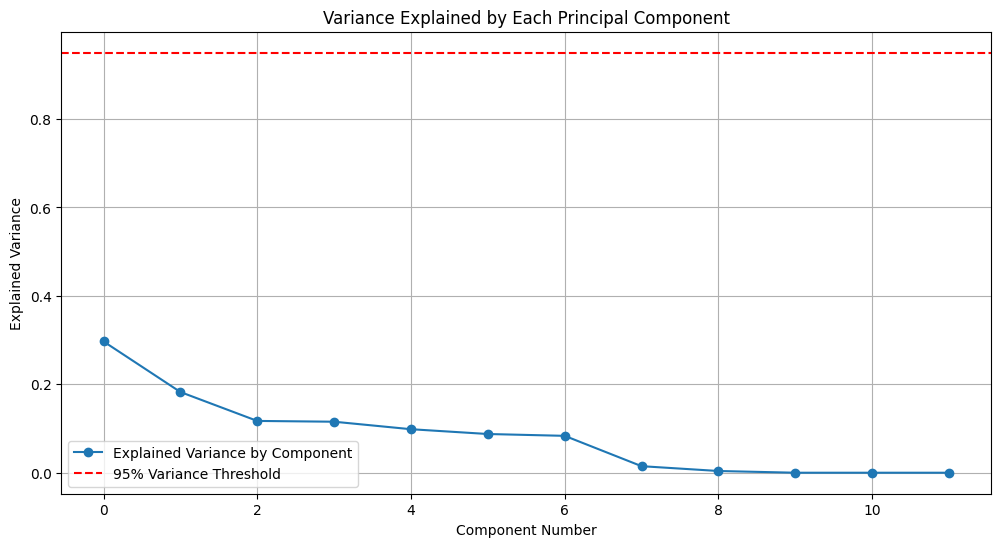

In [29]:
sns.pairplot(final_merged_df[numeric_cols])
plt.suptitle('Pairwise Plot of Original Features', y=1.02)
plt.show()

# Comparison of explained variance
plt.figure(figsize=(12, 6))
plt.plot(explained_variance, marker='o', label='Explained Variance by Component')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

First Two Principle Components by Category

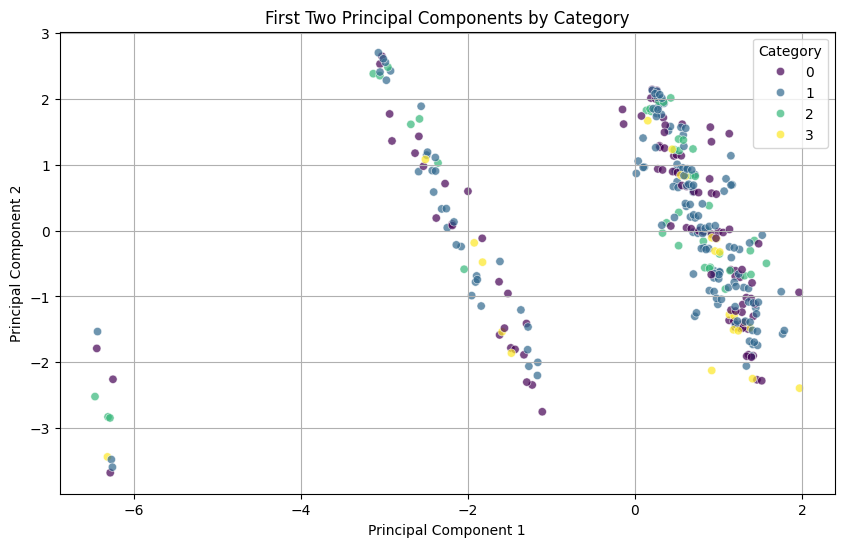

In [30]:
pca_df['Category'] = final_merged_df['Category'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category', palette='viridis', alpha=0.7)
plt.title('First Two Principal Components by Category')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Explained variance ratio of selected components

In [31]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio of selected components: {explained_variance_ratio}')
print(f'Total explained variance: {np.sum(explained_variance_ratio)}')


Explained variance ratio of selected components: [0.29687678 0.18252329 0.11714661 0.11536474 0.09840916 0.08755983
 0.08342829]
Total explained variance: 0.9813087019826188


## Customer Lifetime Value (CLV)

Preprocessing columns for finding requirments to calculate clv

In [32]:
# Ensure 'order_date' is in datetime format and create 'Month' column using .loc
final_merged_df = final_merged_df.copy()  # Create a copy to avoid SettingWithCopyWarning
final_merged_df.loc[:, 'order_date'] = pd.to_datetime(final_merged_df['order_date'])
final_merged_df.loc[:, 'Month'] = final_merged_df['order_date'].dt.to_period('M')

Calculate Average Purchase Value (APV)

In [33]:
# Calculate Average Purchase Value (APV)
final_merged_df.loc[:, 'APV'] = final_merged_df['revenue'] / final_merged_df['quantity']

# Check APV values
print("APV values:")
print(final_merged_df[['Customer ID', 'APV']].drop_duplicates().head())

APV values:
   Customer ID   APV
0     0.000000  0.56
1     0.000000  1.00
3     0.002597  1.00
4     0.015580  0.00
5     0.023371  0.56


Calculate Purchase Frequency (PF) for each customer

In [34]:
# Calculate Purchase Frequency (PF) for each customer
purchase_freq = final_merged_df.groupby('Customer ID')['Month'].nunique()

# Check Purchase Frequency values
print("Purchase Frequency (PF) values:")
print(purchase_freq.head())

Purchase Frequency (PF) values:
Customer ID
0.000000    2
0.002597    1
0.015580    1
0.023371    2
0.040509    1
Name: Month, dtype: int64


Visualizing Purchase Frequency

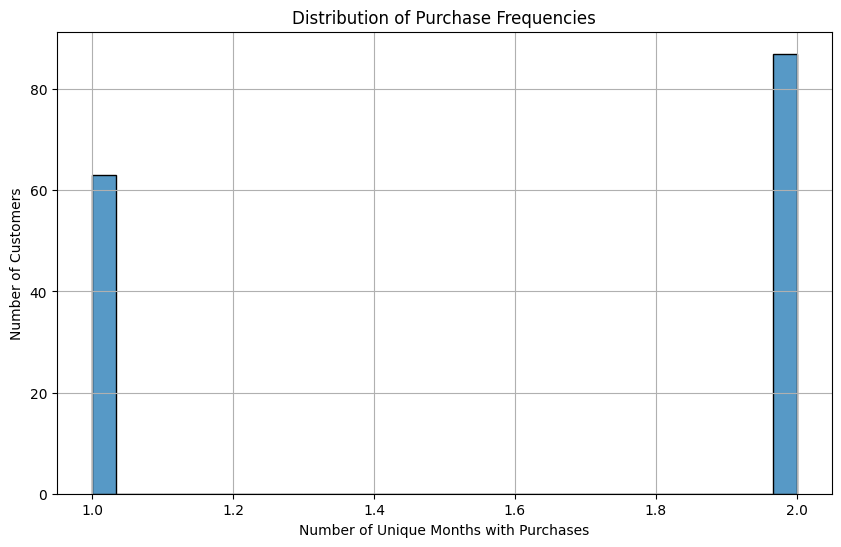

In [35]:
# Use .loc to avoid SettingWithCopyWarning
    final_merged_df.loc[:, col] = le.fit_transform(final_merged_df[col].astype(str))

Calculate Customer Lifespan (CL) for each customer

In [36]:
# Calculate Customer Lifespan (CL) for each customer
customer_lifespan = final_merged_df.groupby('Customer ID')['order_date'].apply(lambda x: (x.max() - x.min()).days / 30)

# Debugging Step: Check Customer Lifespan values
print("Customer Lifespan (CL) values:")
print(customer_lifespan.head())



Customer Lifespan (CL) values:
Customer ID
0.000000    0.866667
0.002597    0.000000
0.015580    0.000000
0.023371    0.866667
0.040509    0.000000
Name: order_date, dtype: float64


Visualizing Customer Lifespan

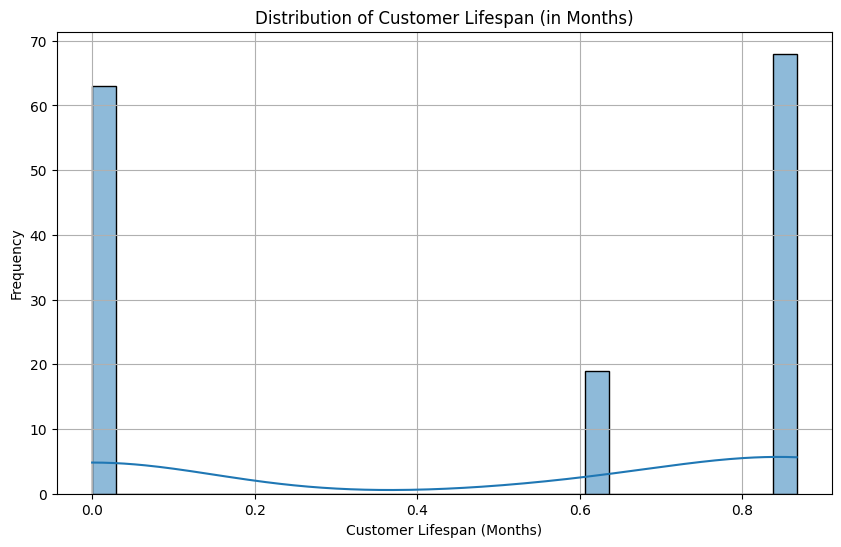

In [37]:
# Plot histogram of customer lifespans
plt.figure(figsize=(10, 6))
sns.histplot(customer_lifespan, bins=30, kde=True)
plt.title('Distribution of Customer Lifespan (in Months)')
plt.xlabel('Customer Lifespan (Months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Calculate CLV for each customer

In [38]:
# Calculate CLV for each customer
clv = final_merged_df.groupby('Customer ID').agg({
    'APV': 'mean',            # Average purchase value for each customer
    'quantity': 'sum'         # Total quantity bought by each customer
})

# Now calculate PF (Purchase Frequency) and CL (Customer Lifespan) per customer
clv.loc[:, 'PF'] = purchase_freq  # This will vary by customer
clv.loc[:, 'CL'] = customer_lifespan * 0.8  # Apply retention rate to each customer lifespan

# Debugging Step: Check intermediate CLV components
print("CLV components (APV, PF, CL):")
print(clv[['APV', 'PF', 'CL']].head())

# Calculate CLV for each customer
clv.loc[:, 'CLV'] = clv['APV'] * clv['PF'] * clv['CL']

# Check if CLV is calculated correctly
print("CLV values:")
print(clv.head())

CLV components (APV, PF, CL):
                  APV   PF        CL
Customer ID                         
0.000000     0.853333  2.0  0.693333
0.002597     1.000000  1.0  0.000000
0.015580     0.000000  1.0  0.000000
0.023371     0.853333  2.0  0.693333
0.040509     1.000000  1.0  0.000000
CLV values:
                  APV  quantity   PF        CL       CLV
Customer ID                                             
0.000000     0.853333         3  2.0  0.693333  1.183289
0.002597     1.000000         1  1.0  0.000000  0.000000
0.015580     0.000000         1  1.0  0.000000  0.000000
0.023371     0.853333         3  2.0  0.693333  1.183289
0.040509     1.000000         1  1.0  0.000000  0.000000


Add the CLV back to the original DataFrame

In [39]:
# Add the CLV back to the original DataFrame
final_merged_df = final_merged_df.merge(clv[['CLV']], left_on='Customer ID', right_index=True, how='left')

# Check if CLV was added correctly to final_merged_df
print("Final merged DataFrame with CLV:")
print(final_merged_df[['Customer ID', 'CLV']].head())

Final merged DataFrame with CLV:
   Customer ID       CLV
0     0.000000  1.183289
1     0.000000  1.183289
2     0.000000  1.183289
3     0.002597  0.000000
4     0.015580  0.000000


Distribution of CLV across Customer Segments Using Box Plot

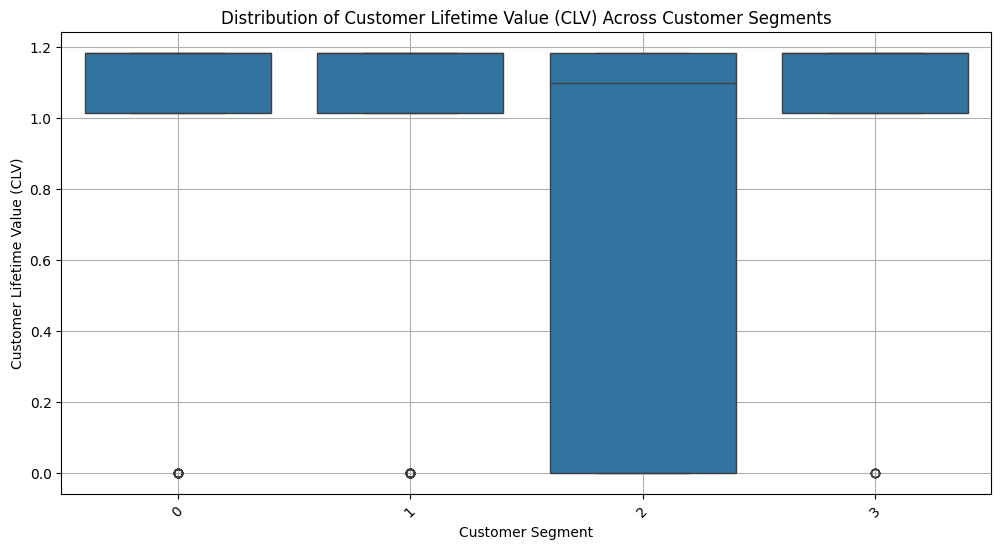

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_merged_df, x='Category', y='CLV')
plt.title('Distribution of Customer Lifetime Value (CLV) Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Distribution of CLV across Customer Segments Using Histogram

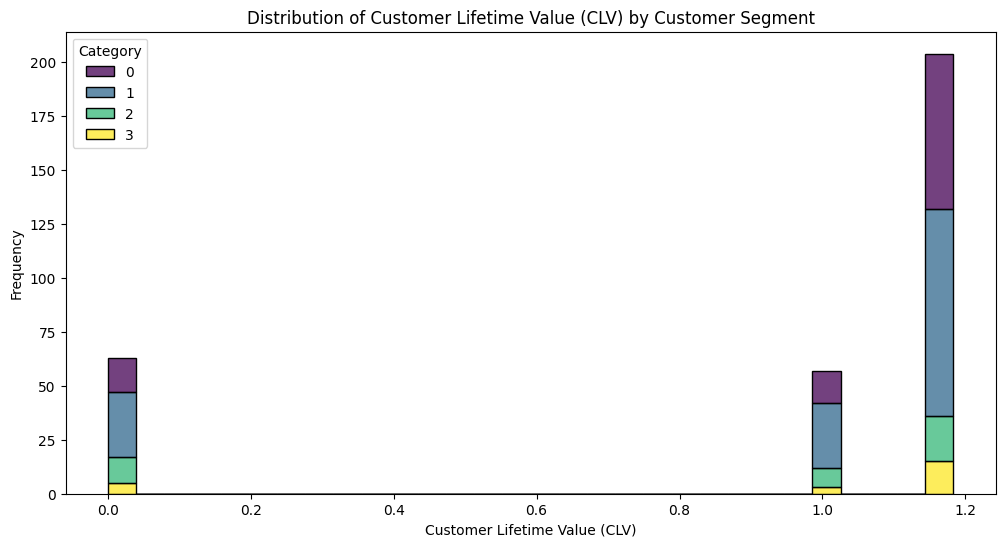

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(final_merged_df, x='CLV', hue='Category', multiple='stack', bins=30, palette='viridis')
plt.title('Distribution of Customer Lifetime Value (CLV) by Customer Segment')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Frequency')
plt.show()


Avergae Cutomer Lifetime Value by Customer Segment

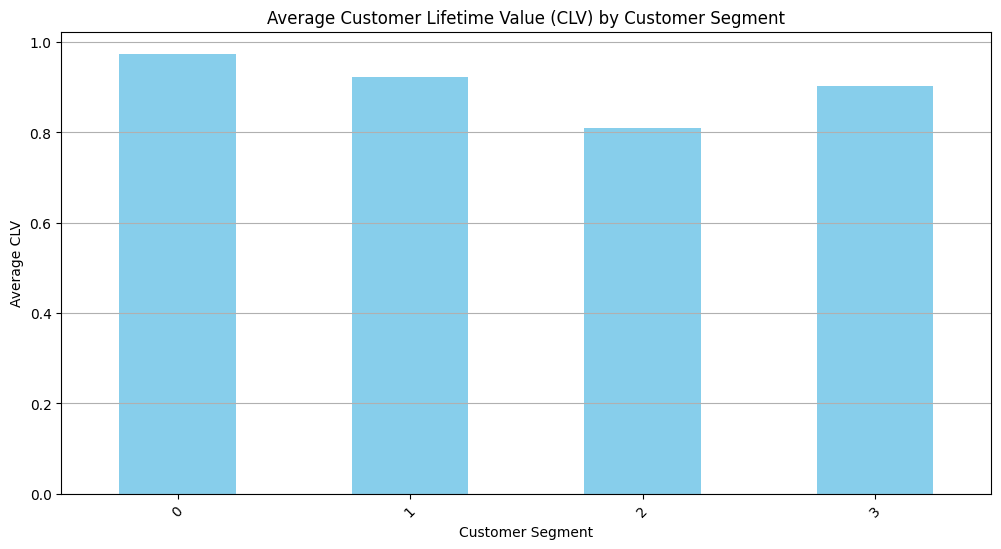

In [42]:
clv_segments = final_merged_df.groupby('Category')['CLV'].mean()
plt.figure(figsize=(12, 6))
clv_segments.plot(kind='bar', color='skyblue')
plt.title('Average Customer Lifetime Value (CLV) by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average CLV')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Base CLV

In [43]:
base_clv = final_merged_df['CLV'].mean()
print(base_clv)

0.9233053497942384


## What-if Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_6492\18175592.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='CLV', data=results, palette='viridis', hue=None)  # Explicitly set hue=None


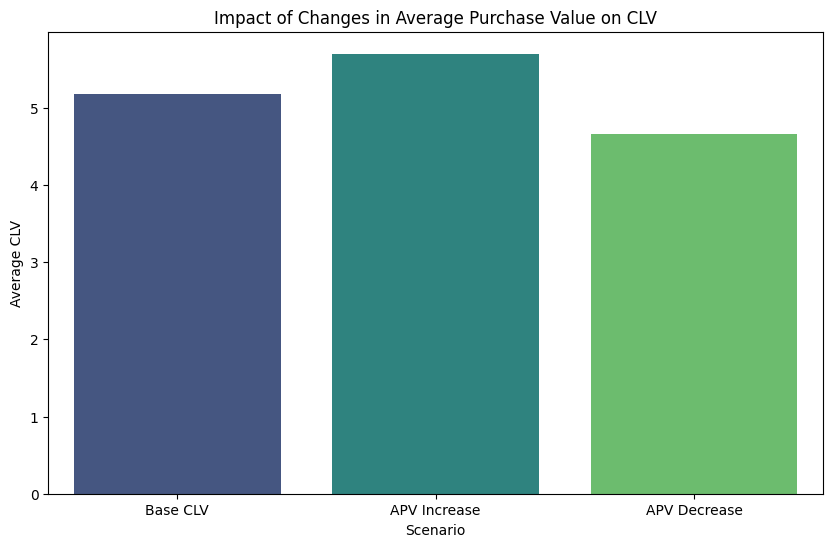

In [44]:
increase_percentage = 0.10  # 10% increase

# Calculate APV if it doesn't exist
if 'APV' not in final_merged_df.columns:
    final_merged_df['APV'] = final_merged_df['Purchase Amount (USD)']

# Assume CL is a constant or estimate it
customer_lifespan = 2  # in years

# Scenario 1: Increase in APV
final_merged_df['APV_increase'] = final_merged_df['APV'] * (1 + increase_percentage)
final_merged_df['CLV_increase'] = final_merged_df['APV_increase'] * final_merged_df['Frequency of Purchases'] * customer_lifespan

# Scenario 2: Decrease in APV
final_merged_df['APV_decrease'] = final_merged_df['APV'] * (1 - increase_percentage)
final_merged_df['CLV_decrease'] = final_merged_df['APV_decrease'] * final_merged_df['Frequency of Purchases'] * customer_lifespan

# Calculate base CLV
final_merged_df['CLV_base'] = final_merged_df['APV'] * final_merged_df['Frequency of Purchases'] * customer_lifespan

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Scenario': ['Base CLV', 'APV Increase', 'APV Decrease'],
    'CLV': [
        final_merged_df['CLV_base'].mean(),
        final_merged_df['CLV_increase'].mean(),
        final_merged_df['CLV_decrease'].mean()
    ]
})

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='CLV', data=results, palette='viridis', hue=None)  # Explicitly set hue=None
plt.title('Impact of Changes in Average Purchase Value on CLV')
plt.xlabel('Scenario')
plt.ylabel('Average CLV')
plt.show()

In [45]:
# Create the Dash application
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("E-commerce Data Analysis Dashboard", style={'textAlign': 'center'}),

    # Dropdown to select a graph
    dcc.Dropdown(
        id='graph-dropdown',
        options=[
            {'label': 'Cumulative Explained Variance by PCA Components', 'value': 'cum_variance'},
            {'label': 'First Two Principal Components', 'value': 'pca_scatter'},
            {'label': 'Pairwise Plot of Original Features', 'value': 'pairwise_plot'},
            {'label': 'Distribution of Purchase Frequencies', 'value': 'purchase_freq_hist'},
            {'label': 'Distribution of Customer Lifespan (in Months)', 'value': 'customer_lifespan_hist'},
            {'label': 'Distribution of Customer Lifetime Value (CLV) Across Segments', 'value': 'clv_boxplot'},
            {'label': 'Distribution of CLV by Customer Segment', 'value': 'clv_hist'},
            {'label': 'Average CLV by Customer Segment', 'value': 'avg_clv_segment'},
            {'label': 'Impact of Changes in APV on CLV', 'value': 'apv_clv_bar'}
        ],
        value='cum_variance',  # Default value
        style={'width': '80%', 'margin': '20px auto'}
    ),

    # Graph placeholder
    dcc.Graph(id='graph-display')
])

# Callback to update the graph based on the dropdown selection
@app.callback(
    Output('graph-display', 'figure'),
    [Input('graph-dropdown', 'value')]
)
def update_graph(selected_graph):
    if selected_graph == 'cum_variance':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=list(range(1, len(cumulative_variance) + 1)), y=cumulative_variance, mode='lines+markers'))
        fig.update_layout(title='Cumulative Explained Variance by PCA Components',
                          xaxis_title='Number of Components',
                          yaxis_title='Cumulative Explained Variance')
    
    elif selected_graph == 'pca_scatter':
        fig = px.scatter(pca_df, x='PC1', y='PC2', color='Category',
                         title='First Two Principal Components by Category')
    
    elif selected_graph == 'pairwise_plot':
        fig = px.scatter_matrix(final_merged_df[numeric_cols])
        fig.update_layout(title='Pairwise Plot of Original Features')
    
    elif selected_graph == 'purchase_freq_hist':
        fig = px.histogram(purchase_freq, nbins=30, title='Distribution of Purchase Frequencies')
        fig.update_layout(xaxis_title='Number of Unique Months with Purchases',
                          yaxis_title='Number of Customers')
    
    elif selected_graph == 'customer_lifespan_hist':
        fig = px.histogram(customer_lifespan, nbins=30, title='Distribution of Customer Lifespan (in Months)', marginal="box")
        fig.update_layout(xaxis_title='Customer Lifespan (Months)',
                          yaxis_title='Frequency')
    
    elif selected_graph == 'clv_boxplot':
        fig = px.box(final_merged_df, x='Category', y='CLV', title='Distribution of Customer Lifetime Value (CLV) Across Customer Segments')
    
    elif selected_graph == 'clv_hist':
        fig = px.histogram(final_merged_df, x='CLV', color='Category', title='Distribution of Customer Lifetime Value (CLV) by Customer Segment',
                           barmode='stack')
    
    elif selected_graph == 'avg_clv_segment':
        clv_segments = final_merged_df.groupby('Category')['CLV'].mean().reset_index()
        fig = px.bar(clv_segments, x='Category', y='CLV', title='Average Customer Lifetime Value (CLV) by Customer Segment')
    
    elif selected_graph == 'apv_clv_bar':
        results = pd.DataFrame({
            'Scenario': ['Base CLV', 'APV Increase', 'APV Decrease'],
            'CLV': [
                final_merged_df['CLV_base'].mean(),
                final_merged_df['CLV_increase'].mean(),
                final_merged_df['CLV_decrease'].mean()
            ]
        })
        fig = px.bar(results, x='Scenario', y='CLV', title='Impact of Changes in Average Purchase Value on CLV')

    return fig

# Run the server
if __name__ == '__main__':
    app.run_server(port=8051, debug=False)
